12/14/18
Data generated by Wenchao

## Import Library

In [3]:
# Project specific libraries
library(limma)
library(edgeR)
library(DESeq2)
library(reshape2)
library(ggplot2)

In [4]:
# Import Lib for exixting scripts
library(devtools)
library(roxygen2)

#### Working directory

In [5]:
# DFCI
setwd ("Z:/Ajit/wenchao data")

## Import data

In [22]:
data <- read.table("RawData.txt", header=T, sep="\t")
pdata <- read.table("pdata.txt", header=T, sep="\t")

### Pre-processing

In [23]:
# Remove transcripts that are not expressed in 3 or more samples
#data <- data[rowSums(data[2:ncol(data)])!=0, ]
data <- data[apply(data[2:ncol(data)] == 0, 1, sum) <= 3, ]
dim (data)

[1] 8972   19

In [24]:
# Merge multiple transcripts into one gene
# Import function
source_url("https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/r_scripts/collapse_to_one_gene.R")
# Merge
data_merged <- genesummary (data)
dim(data_merged)
head(data_merged)

SHA-1 hash of file is a0c6a4622daa5b3775f335059a29d6224d9f4032


[1] 8972   18

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,23,15,8,9,8,0,11,12,2,12,14,17,8,2,9,13,14,23
AACS,12,12,11,6,6,0,10,21,4,4,5,3,3,1,16,9,1,6
AAED1,20,25,20,12,9,2,14,17,5,17,11,8,11,3,16,14,16,6
AAGAB,8,11,14,7,9,1,12,8,4,7,19,10,2,5,20,9,12,14
AAK1,17,17,12,15,24,3,13,13,1,13,12,6,15,9,6,10,17,13
AAMDC,4,3,3,3,4,2,8,5,1,2,2,2,1,0,3,3,3,4


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


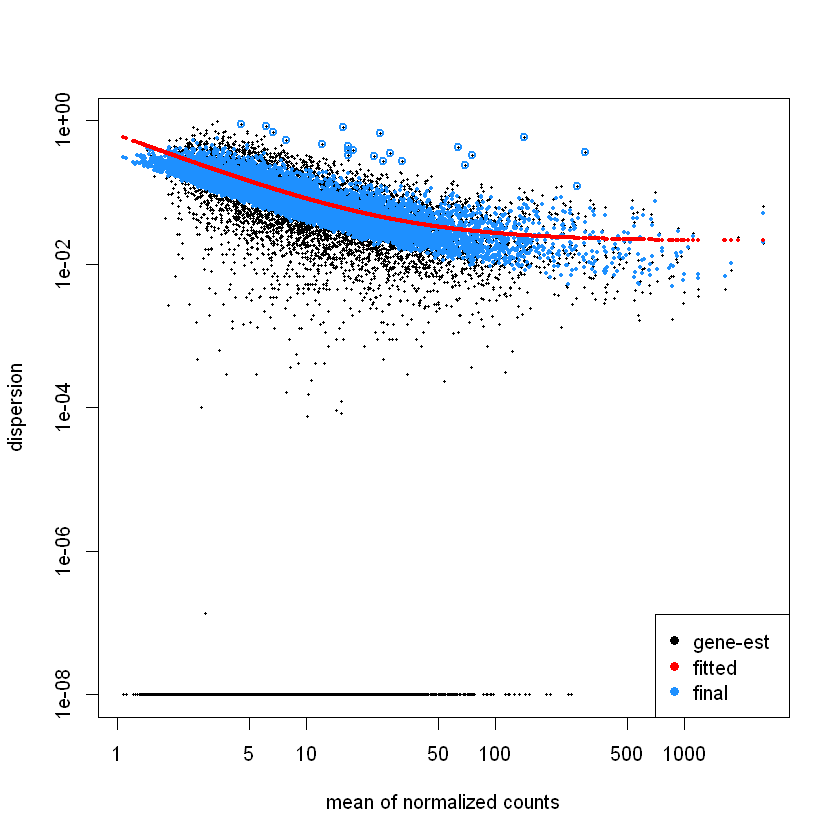

In [25]:
# Normalise data using limma-voom
# Create design matrix
#design <- model.matrix(~ pdata$Resistance)
# Apply voom transformation
#nf <- calcNormFactors(data_merged)
#v <- voom(data_merged, design, lib.size=colSums(data_merged)*nf, normalize.method="quantile", plot=TRUE)

# Normalise data using DE-Seq
dds <- DESeqDataSetFromMatrix(countData = data_merged, colData = pdata, design = ~ Treatment + Resistance)
dds <- DESeq(dds)
plotDispEsts(dds)

# EdgeR normalisation
#dge <- DGEList(counts=data_merged, group=pdata$Resistance)
# Normalize by total count
#dge <- calcNormFactors(dge)
# Create the contrast matrix
#design.mat <- model.matrix(~ 0 + dge$samples$group)
#colnames(design.mat) <- levels(dge$samples$group)
# Estimate dispersion parameter for GLM
#dge <- estimateGLMCommonDisp(dge, design.mat)
#dge <- estimateGLMTrendedDisp(dge, design.mat, method="power")
#dge<- estimateGLMTagwiseDisp(dge,design.mat)
#plotBCV(dge)

In [26]:
# Results
res <- results(dds)

In [27]:
# Normalize the data by rlog method for other analysis
rld <- rlog(dds, blind=FALSE)

In [28]:
# Extract the normalised data from the deseq file
#n_data <- data.frame(counts(dds, normalized=TRUE))
n_data <- data.frame(assay(rld))
head(n_data)

,P1_DMSO,P2_DMSO,P3_DMSO,P1_Len,P2_Len,P3_Len,P1_Pom,P2_Pom,P3_Pom,R1_DMSO,R2_DMSO,R3_DMSO,R1_Len,R2_Len,R3_Len,R1_Pom,R2_Pom,R3_Pom
AAAS,3.671929,3.275507,2.850717,2.935623,2.768541,2.828600,3.050357,3.081495,3.071955,3.088215,3.172411,3.571823,3.572597,2.793540,2.901428,3.163444,3.298136,3.710470
AACS,2.773457,2.765474,2.732351,2.342137,2.265639,2.265641,2.645112,3.237126,2.920459,2.108793,2.180829,2.122380,2.527620,2.178140,3.014624,2.558103,1.818384,2.338692
AAED1,3.644415,3.849744,3.677434,3.248145,2.943339,3.420357,3.342119,3.469888,3.702957,3.477391,3.089231,3.086235,3.987633,3.078497,3.445062,3.326458,3.518868,2.796051
AAGAB,2.738518,2.948391,3.174986,2.690805,2.758531,2.896398,3.032873,2.717261,3.275351,2.643149,3.354794,3.043558,2.712322,3.084167,3.461896,2.811156,3.089815,3.179975
AAK1,3.478724,3.469144,3.219180,3.411358,3.730057,3.572530,3.263271,3.227083,3.033199,3.234179,3.134388,2.892474,4.278427,3.728627,2.745367,3.051078,3.555039,3.287603
AAMDC,1.358578,1.240299,1.258591,1.263190,1.325191,1.675409,1.750704,1.450659,1.377272,1.114112,1.098350,1.193114,1.269339,1.057133,1.245258,1.242500,1.278049,1.376754


## Data quality assessment by sample clustering and visualization 

No id variables; using all as measure variables
No id variables; using all as measure variables
Warning message:
"Removed 6476 rows containing non-finite values (stat_boxplot)."

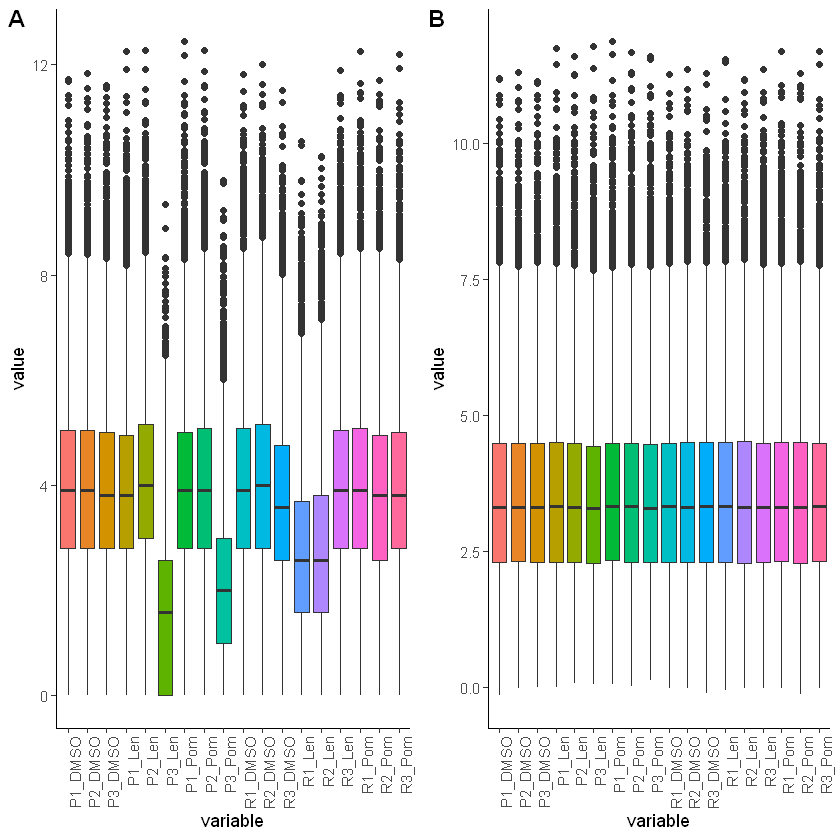

In [47]:
# Vizulaize expression profile before and after normalization
library(cowplot)

p1 <- ggplot(data = melt(log2(data_merged)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))
# After normalization
p2 <- ggplot(data = melt(n_data), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+
      theme_classic()+
      theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))

plot_grid(p1, p2, labels = "AUTO")


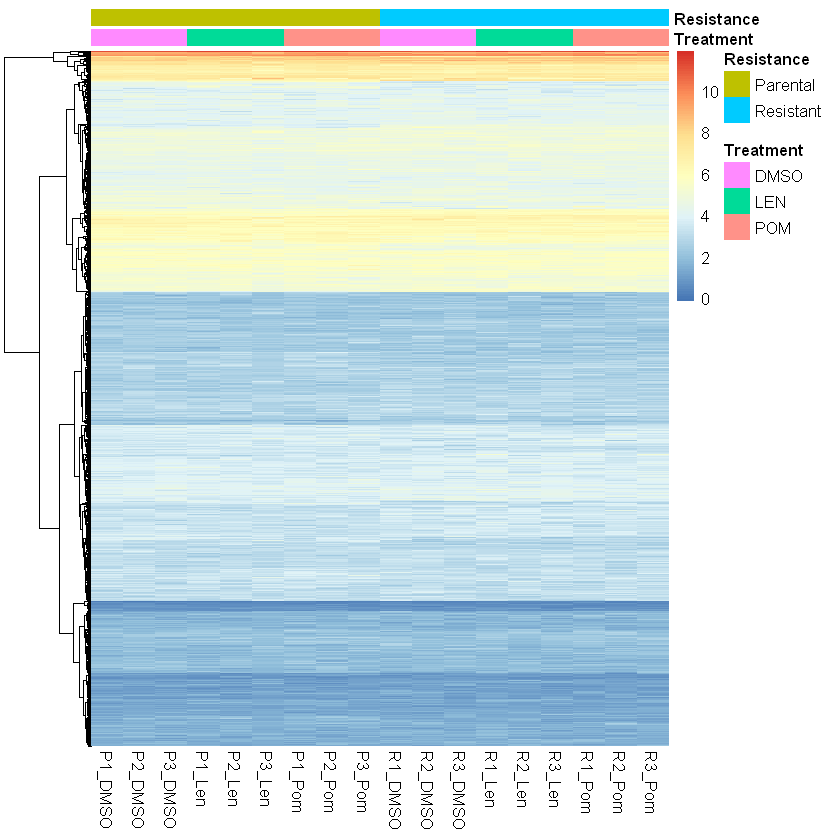

In [38]:
# Heatmap of the count matrix
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)
df <- as.data.frame(colData(dds)[,c("Treatment","Resistance")])
pheatmap(assay(rld)[select,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

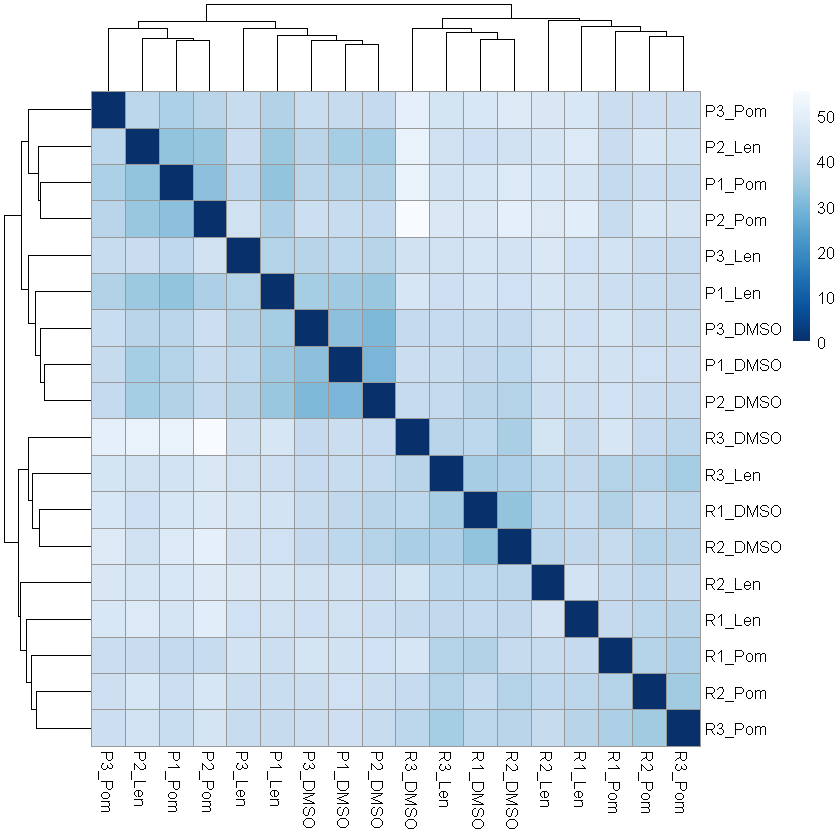

In [43]:
# Heatmap of the sample-to-sample distances
sampleDists <- dist(t(assay(rld)))
# Heatmap
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

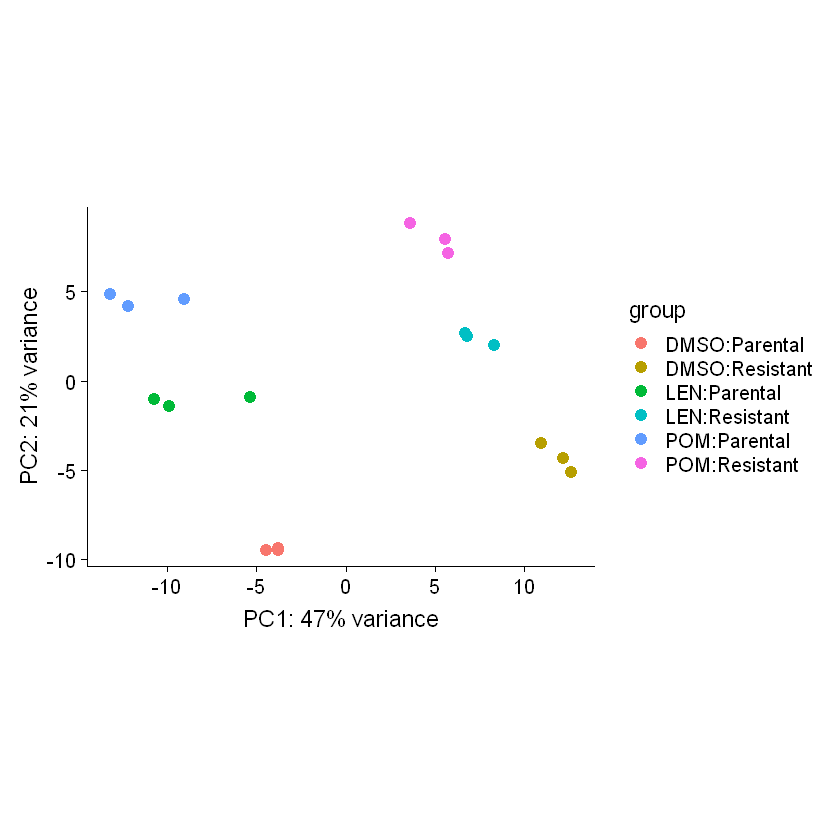

In [54]:
# Plot PCA
plotPCA(rld, intgroup=c("Treatment","Resistance"))

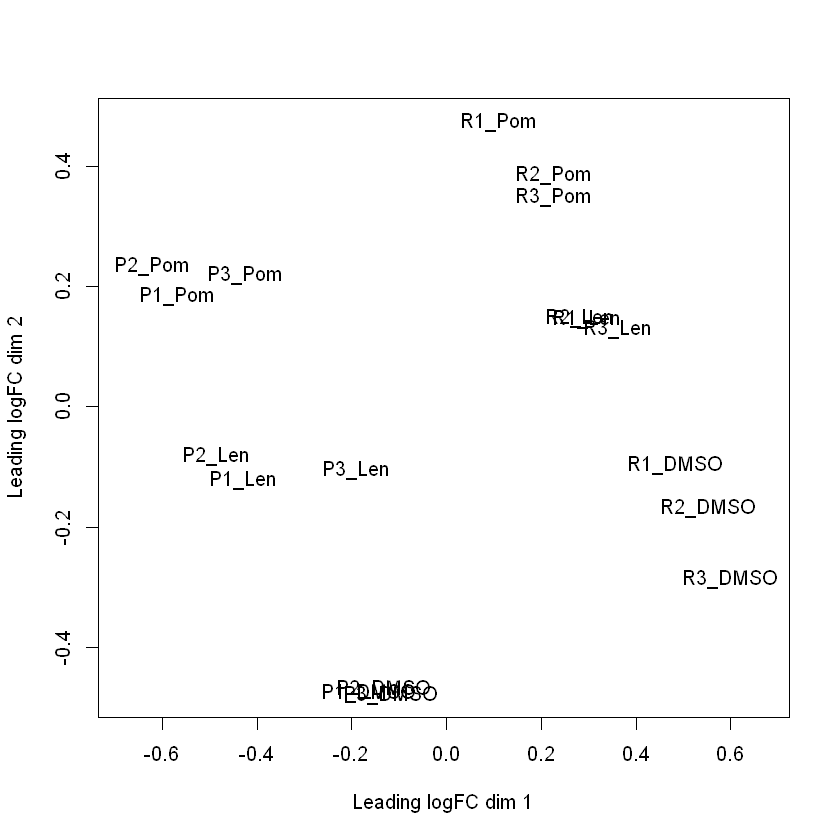

In [57]:
# Multidimensional scaling (MDS)
plotMDS(n_data)

## Differential gene expression analysis

## Export data